# Image Basics
The following example shows how to read and show an image.

In [1]:
from __future__ import print_function
import cv2

image_location = './images/trex.png'
image = cv2.imread(image_location)
print("width: {} pixels, height: {} piexles, channels: {}".format(image.shape[1], image.shape[0], image.shape[2]))

cv2.imshow("Image", image)
cv2.waitKey(0)

corner = image[50:300,400:700]
cv2.imshow("Corner", corner)
cv2.waitKey(0)
cv2.destroyAllWindows()

width: 693 pixels, height: 446 piexles, channels: 3


# Drawing

### (1) Lines and Rectangles

In [2]:
from __future__ import print_function
import cv2
import numpy as np

canvas = np.zeros((300, 300, 3), dtype = "uint8")

green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)

red = (0, 0, 255)
cv2.line(canvas, (100, 0), (100, 300), red, 3)

cv2.rectangle(canvas, (10, 10), (60, 60), green)

cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)

blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)

cv2.imshow("Canvas", canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

### (2) Circles

In [3]:
from __future__ import print_function
import cv2
import numpy as np

canvas = np.zeros((300, 300, 3), dtype = "uint8")
(centerX, centerY) = (canvas.shape[1] //2, canvas.shape[0] //2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY), r, white)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

for i in range(0, 25):
    radius = np.random.randint(5, high = 200)
    color = np.random.randint(0, high = 256, size =(3,)).tolist()
    pt = np.random.randint(0, high = 300, size = (2,))
    cv2.circle(canvas, tuple(pt), radius, color, -1)
    
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Processing

### (1) Image Transformations
The following example implements basic image transformations, such as translation, rotation, resizing, flipping, etc.

In [4]:
import cv2
import numpy as np

def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w/2, h/2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w *r), height)
    else:
        r = width / float(w)
        dim = (width, int(h *r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized
    
image_location = './images/trex.png'
image = cv2.imread(image_location)
cv2.imshow("Image", image)
cv2.waitKey(0)

shifted = translate(image, 50, 100)
cv2.imshow("Shifted", shifted)
cv2.waitKey(0)

rotated = rotate(image, 45)
cv2.imshow("Rotated", rotated)
cv2.waitKey(0)

resized = resize(image, width = 1000)
cv2.imshow("Resized", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

image_location = './images/trex.png'
image = cv2.imread(image_location)
cv2.imshow("Original", image)
cv2.waitKey(0)

flipped_hori = cv2.flip(image, 1)
cv2.imshow("Flipped Horizontally", flipped_hori)
cv2.waitKey(0)

flipped_vert = cv2.flip(image, 0)
cv2.imshow("Flipped Vertically", flipped_vert)
cv2.waitKey(0)

flipped = cv2.flip(image, -1)
cv2.imshow("Flipped Horizontally & Vertically", flipped)
cv2.waitKey(0)
cv2.destroyAllWindows()

### (2) Image Arithmetic

In [6]:
import cv2
import numpy as np

image_location = './images/trex.png'
image = cv2.imread(image_location)
cv2.imshow("Original", image)
cv2.waitKey(0)

print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

M = np.ones(image.shape, dtype = "uint8") * 50
added = cv2.add(image, M)
cv2.imshow("Original", added)
cv2.waitKey(0)


M = np.ones(image.shape, dtype = "uint8") * 100
subtracted = cv2.subtract(image, M)
cv2.imshow("Subtracted", subtracted)
cv2.waitKey(0)
cv2.destroyAllWindows()

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


### (3) Bitwise Operations
We will review four bitwise operations: AND, OR, XOR, and NOT.

In [7]:
import cv2
import numpy as np

rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", rectangle)
cv2.waitKey(0)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", circle)
cv2.waitKey(0)

bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)

bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

bitwiseNot = cv2.bitwise_not(circle)
cv2.imshow("NOT", bitwiseNot)
cv2.waitKey(0)
cv2.destroyAllWindows()

### (4) Masking
Using a mask allows us to focus only on the portions of the image that interests us.

In [8]:
import cv2
import numpy as np

image_location = './images/beach.png'
image = cv2.imread(image_location)
cv2.imshow("Original", image)
cv2.waitKey(0)

mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] //2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75, cY + 75), 255, -1)
cv2.imshow("Mask", mask)

masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Masked", masked)
cv2.waitKey(0)

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Mask", mask)
cv2.imshow("Masked", masked)
cv2.waitKey(0)
cv2.destroyAllWindows()

### (5) Splitting and Merging Channels

In [9]:
import cv2
import numpy as np

image_location = './images/beach.png'
image = cv2.imread(image_location)
(B, G, R) = cv2.split(image)

cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

merged = cv2.merge([B, G, R])
cv2.imshow("Merged", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

### (6) Color Spaces
There are many other color spaces that we can utilize except the RGB color space.

The Hue-Saturation-Value (HSV) color space is more similar to how humans think and conceive of color.

In [10]:
import cv2
import numpy as np

image_location = './images/beach.png'
image = cv2.imread(image_location)
cv2.imshow("Original", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)


hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imshow("Lab", lab)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histograms
A histogram represents the distribution of pixel intensities in an image

### (1) Grayscale Histograms

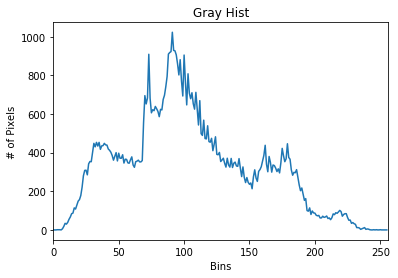

In [11]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline

image_location = './images/beach.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original", image)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.title("Gray Hist")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### (2) Color Histograms

3D histogram shape: (8, 8, 8), with 512 values


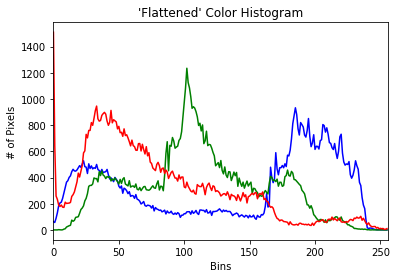

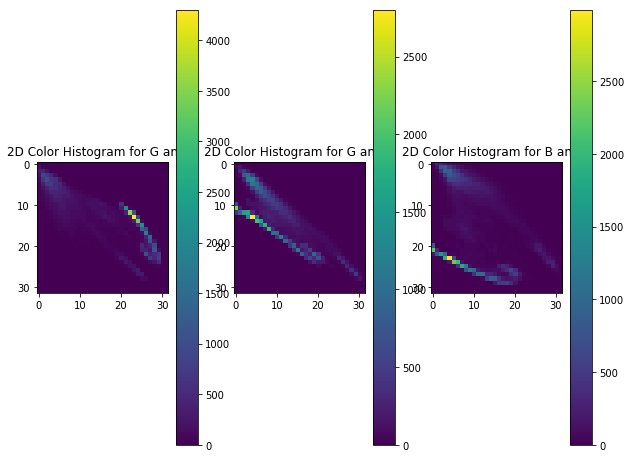

In [12]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline

#fig = plt.figure(figsize=(10, 4))

image_location = './images/beach.png'
image = cv2.imread(image_location)
cv2.imshow("Original", image)
cv2.waitKey(0)


chans = cv2.split(image)
colors = ("b", "g", "r")
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color =color)
    plt.xlim([0, 256])
    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

plt.show()
cv2.destroyAllWindows()

### (3) Histogram Equalization
Histogram equalization improves the contrast of an image by "stretching" the distribution of pixels. This method is useful when an image contains forgrounds and backgrounds that are both dark and both light. It is normally useful when enhancing the contrast of medical or satellite images.

In [13]:
import cv2
import numpy as np

image_location = './images/beach.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

eq = cv2.equalizeHist(image)

cv2.imshow("Histogram Equalization", np.hstack([image, eq]))

cv2.waitKey(0)
cv2.destroyAllWindows()

### (4) Histograms and Masks
To construct a mask and compute color histograms for the masked region only.

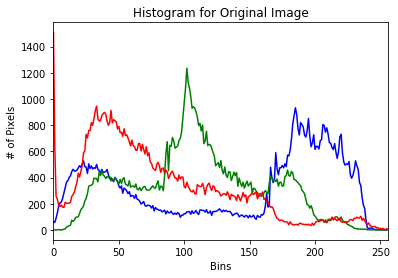

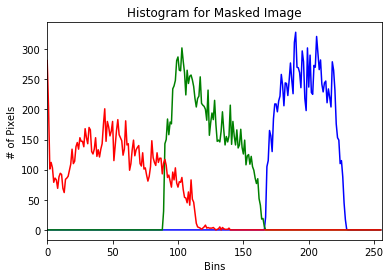

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    for (chans, color) in zip(chans, colors):
        hist = cv2.calcHist([chans], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

image_location = './images/beach.png'
image = cv2.imread(image_location)
cv2.imshow("Original", image)
plot_histogram(image, "Histogram for Original Image")

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 130), 255, -1)
cv2.imshow("Mask", mask)

masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)

plot_histogram(image, "Histogram for Masked Image", mask = mask)
plt.show()
cv2.destroyAllWindows()

# Smoothing and Blurring
Although unwanted in our photographs, blurring is actually quite helpful when performing image processing tasks. In fact, many image processing and computer vision functions, such as thresholding and edge detection, perform better if the image if first smoothed or blurred.

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image_location = './images/trex.png'
image = cv2.imread(image_location)
cv2.imshow("Original", image)

blurred = np.hstack([cv2.blur(image, (3, 3)), cv2.blur(image, (5, 5)), cv2.blur(image, (7, 7))])
cv2.imshow("Averaged", blurred)
cv2.waitKey(0)

blurred = np.hstack([cv2.GaussianBlur(image, (3, 3), 0), cv2.GaussianBlur(image, (5, 5), 0), cv2.GaussianBlur(image, (11, 11), 0)])
cv2.imshow("Gaussian", blurred)
cv2.waitKey(0)

blurred = np.hstack([cv2.medianBlur(image, 3), cv2.medianBlur(image, 5), cv2.medianBlur(image, 11)])
cv2.imshow("Median", blurred)
cv2.waitKey(0)

blurred = np.hstack([cv2.bilateralFilter(image, 5, 21, 21), cv2.bilateralFilter(image, 7, 31, 31), cv2.bilateralFilter(image, 9, 41, 41)])
cv2.imshow("Bilateral", blurred)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Thresholding
Thresholding is the binarization of an image. Normally, we use thresholding to focus on objects or areas of particular interest in an image.

### (1) Simple Thresholding
In the following example, any pixel value that is greater than 155 is set to 255, any value that is less than 155 is set to zero.

In [16]:
import cv2
import numpy as np

image_location = './images/coins.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Image", image)


(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh)


(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold Binary Inverse", threshInv)

masked = cv2.bitwise_and(image, image, mask = threshInv)
cv2.imshow("Coins", masked)
cv2.waitKey(0)

cv2.destroyAllWindows()

### (2) Adaptive Thresholding
This method considers small neighbors of pixels and then finds an optimal threshold value for each neighbor. 

In [17]:
import cv2
import numpy as np

image_location = './images/coins.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Image", image)

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
cv2.imshow("Mean Thresh", thresh)

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
cv2.imshow("Gaussian Thresh", thresh)
cv2.waitKey(0)

cv2.destroyAllWindows()

### (3) Otsu and Riddler-Calvard
Just another way to automatically compute the threshold value.

In [18]:
import cv2
import numpy as np
import mahotas

image_location = './images/coins.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Image", image)
cv2.waitKey(0)

T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Otsu", thresh)
cv2.waitKey(0)

T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard threshold: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Riddler-Calvard", thresh)
cv2.waitKey(0)

cv2.destroyAllWindows()

Otsu's threshold: 137
Riddler-Calvard threshold: 137.799281092233


# Gradients and Edge Detection
Edge detection embodies mathematical methods to find points in an image where the brighness of pixel intensities changes distinctly.

### (1) Laplacian and Sobel

First use Laplacian method to compute the gradient magnitude image by calling the `cv2.Laplacian` function.Then, use `cv2.Sobel` to find the edges.

In [19]:
import cv2
import numpy as np

image_location = './images/coins.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("original", image)

lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2.imshow("Laplacian", lap)

sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

cv2.imshow("Sobel X", sobelX)
cv2.imshow("Sobel Y", sobelY)
cv2.imshow("Sobel Combined", sobelCombined)
cv2.waitKey(0)

cv2.destroyAllWindows()

### (2) Canny Edge Detector

In [20]:
import cv2
import numpy as np

image_location = './images/coins.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imshow("Blurred", image)

canny = cv2.Canny(image, 30, 150)
cv2.imshow("Canny", canny)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Contours
In order to find contours in an image, you need to first obtain a binarization of the image, using either edge detection methods or thresholding.

In the following example, we'll use the Candy edge detector to find the ourlines of the coins, and then find the actual contours of the coins.

In [21]:
import cv2
import numpy as np

image_location = './images/coins.png'
image = cv2.imread(image_location)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
cv2.imshow("Image", image)

edged = cv2.Canny(blurred, 30, 150)
cv2.imshow("Edges", edged)

(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("I count {} coins in this image".format(len(cnts)))

coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
cv2.imshow("Coins", coins)
cv2.waitKey(0)

for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    print("Coin #{}".format(i + 1))
    coin = image[y:y + h, x:x + w]
    cv2.imshow("Coin", coin)
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    masked = cv2.bitwise_and(coin, coin, mask = mask)
    cv2.imshow("Masked Coin", masked)
    cv2.waitKey(0)

cv2.destroyAllWindows()

I count 9 coins in this image
Coin #1
Coin #2
Coin #3
Coin #4
Coin #5
Coin #6
Coin #7
Coin #8
Coin #9
